In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans  
from sklearn import metrics , preprocessing
%matplotlib inline

In [9]:
clus_df =pd.read_csv('Cust_Segmentation.csv')
clus_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [10]:
clus_df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [20]:
df = clus_df.drop('Address',axis=1)
x= df.values[:,1:]
x = np.nan_to_num(x)
x

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [21]:
clus_dataset = preprocessing.StandardScaler().fit_transform(x)

In [22]:
k_means = KMeans(init='k-means++' , n_clusters=3, n_init=15)
k_means.fit(clus_dataset)
labels=k_means.labels_

In [23]:
df['clus type'] = labels
df.groupby('clus type').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clus type,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


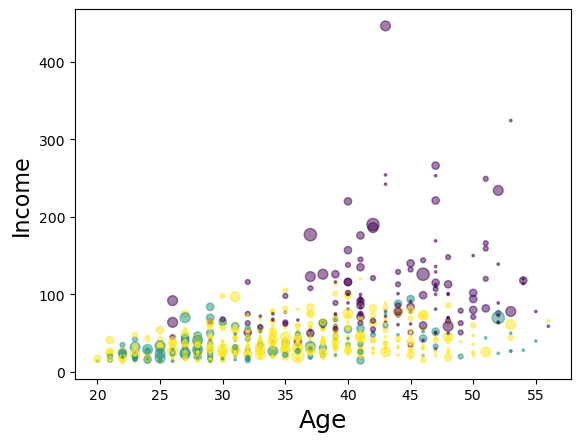

In [28]:
area = np.pi * (x[:,1])**2
plt.scatter(x[:,0],x[:,3],s = area ,c= labels.astype(np.float64) , alpha=0.5)

plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()
